### Predicting Diamond's Price

In this project, I try to make a linear model for predicting the diamond's price based on its carate, clarity, color, and cut. The data include more than 50,000 rows of data including the prices of diamonds with different color, clarity, cut, and carate and I split the model to include both training and testing population. Based on training population, I make a model and then test the model based on the testing population. Finally, I compare two regression models  

In [7]:
import pandas as pd
import sklearn
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import math
from sklearn import metrics

In [8]:
# data are provided from https://www.kaggle.com/shivam2503/diamonds
cwd = os.getcwd()
dia = pd.read_csv(cwd + '\diamonds.csv', index_col = 0)

cut_dict = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
clarity_dict = {"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

dia ['color']= dia ['color'].map (color_dict)
dia ['clarity']= dia ['clarity'].map (clarity_dict)
dia ['cut']= dia ['cut'].map (cut_dict)

dia.dropna(inplace = True)

dia_log = pd.DataFrame()
dia_log ['price'] = dia ['price'].apply (lambda x: math.log10(x))
dia_log ['carat'] = dia ['carat'].apply (lambda x: math.log10(x))

First, we want to get a sense of the diamonds and their attributes. 

#### Data Exploration

Text(0, 0.5, 'log(price)')

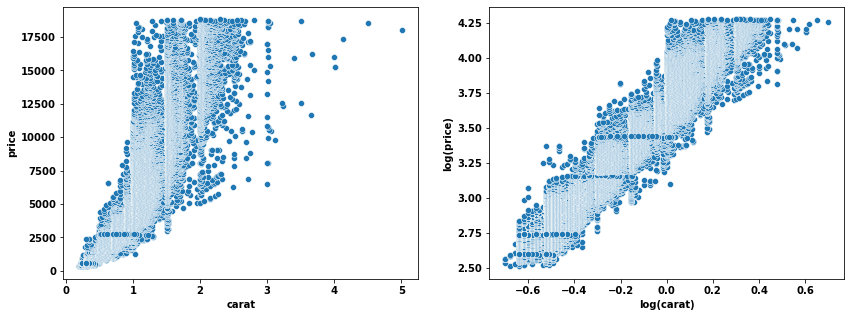

In [9]:
fig , ax = plt.subplots(figsize = (14,5),nrows = 1, ncols = 2)
sns.scatterplot(data = dia, x='carat' , y = 'price', ax = ax[0])
ax[0].set_xlabel('carat')
ax[0].set_ylabel('price')

sns.scatterplot(data = dia_log, x='carat' , y = 'price', ax = ax[1])
ax[1].set_xlabel('log(carat)')
ax[1].set_ylabel('log(price)')

It is clear that log(price) and log(carat) has quite a linear correlation

In [10]:
dia ['price'] = dia ['price'].apply (lambda x: math.log10(x))
dia ['carat'] = dia ['carat'].apply (lambda x: math.log10(x))

<AxesSubplot:xlabel='cut', ylabel='price'>

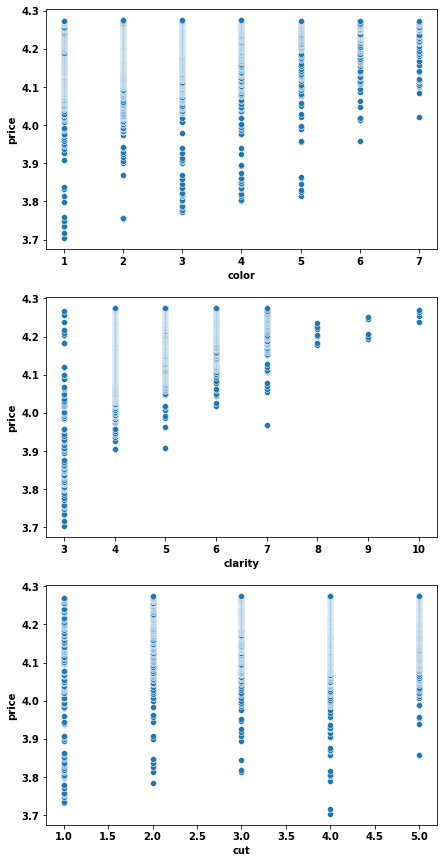

In [11]:
fig , ax = plt.subplots(figsize = (7,15),nrows = 3, ncols = 1)
sns.scatterplot(data = dia[dia['carat']>0.3] , x='color' , y = 'price', ax = ax[0])
sns.scatterplot(data = dia[dia['carat']>0.3], x='clarity' , y = 'price', ax = ax[1])
sns.scatterplot(data = dia[dia['carat']>0.3], x='cut' , y = 'price', ax = ax[2])

The effects of cut, clarity, and color are shown to be dependent on other parameters. Meanwhile, by imporving cut, clarity, and color (higher values), the minimum price would be more and so we expet them to have a positive correlation with price.

#### Predicting Test Data

In [12]:
dia = sklearn.utils.shuffle(dia)
y= dia ['price']
X = dia [['carat', 'cut', 'color', 'clarity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
carat,1.877140
cut,0.013882
color,0.033760
clarity,0.053627


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **log(carat)** is associated with an **increase of 1.879 log(price)**.
- Holding all other features fixed, a 1 unit increase in **cut** is associated with an **increase of 0.014 log(price)**.
- Holding all other features fixed, a 1 unit increase in **color** is associated with an **increase of 0.034 log(price)**.
- Holding all other features fixed, a 1 unit increase in **clarity** is associated with an **increase of 0.053 log(price)**.

C:\Users\hamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Log (Price) _ Predicted')

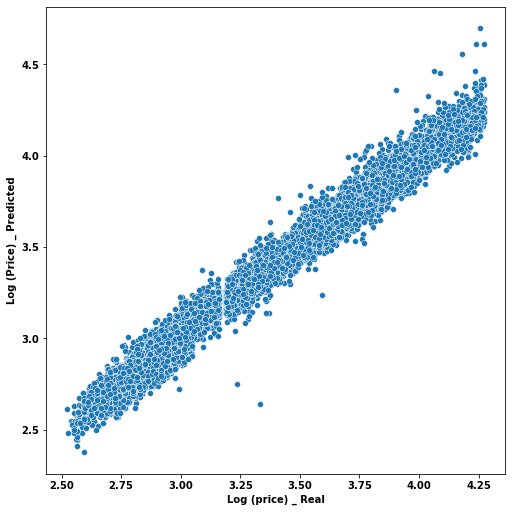

In [15]:
fig, ax = plt.subplots(figsize = (7,7), constrained_layout=True)
predictions = lm.predict( X_test)
sns.scatterplot(y_test,predictions, ax = ax)
ax.set_xlabel('Log (price) _ Real')
ax.set_ylabel('Log (Price) _ Predicted')

#### Evaluating the Model

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Erro:', metrics.mean_squared_error(y_test, predictions))
print('Squared Mean Squared Erro:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.04872402204832227
Mean Squared Erro: 0.0039066906468998575
Squared Mean Squared Erro: 0.06250352507578959


#### Residuals

Text(0.5, 0, 'log(price)')

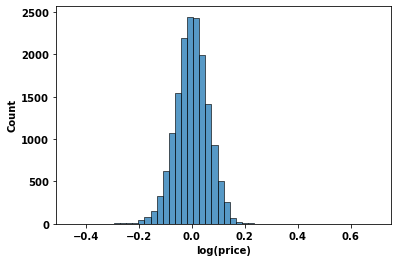

In [17]:
sns.histplot((y_test-predictions),bins=50);
plt.xlabel('log(price)')

The residuals looks normally distributed as that means the model is working good.

Now, that we see the model is working, we can assume that the 